In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn
import seaborn as sns
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =[10,5]
import warnings
warnings.simplefilter(action='ignore' , category=FutureWarning)




In [2]:
full_data=pd.read_csv("/content/USA_Housing.csv")

In [3]:
full_data.shape

(5000, 7)

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
full_data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
full_data.tail(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


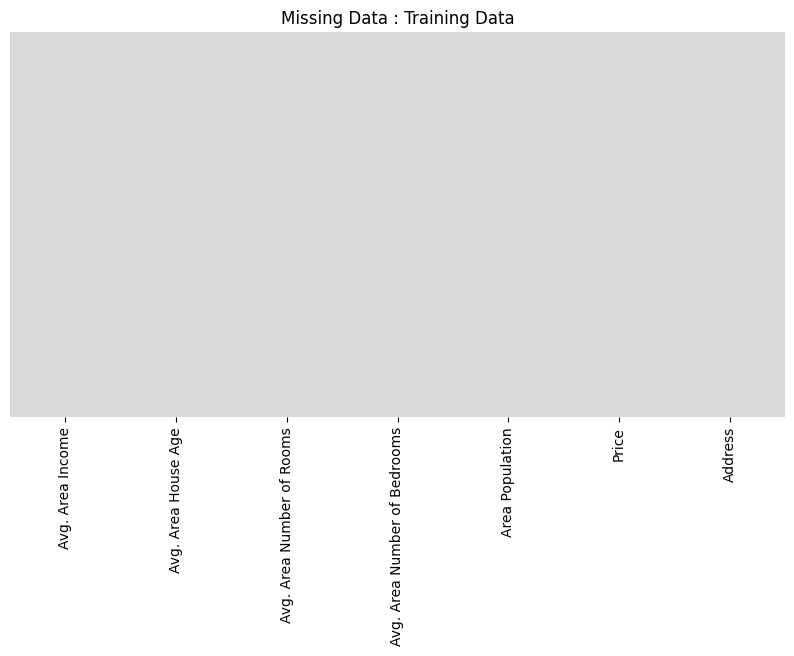

In [9]:
sns.heatmap(full_data.isnull() ,yticklabels=False , cbar=False , cmap='tab20c_r')
plt.title('Missing Data : Training Data')
plt.show()

In [10]:

full_data.drop('Address' , axis=1, inplace=True)

In [11]:
full_data.dropna( inplace =True)

In [12]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [13]:
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
#split the data to used in models
#create matrix of features
x=full_data.drop('Price' , axis=1)
#create tarfget variables
y=full_data['Price']

In [15]:
x.shape

(5000, 5)

In [16]:
y.shape

(5000,)

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=.20, random_state=101)

In [18]:
x_train.shape

(4000, 5)

In [19]:
y_train.shape

(4000,)

In [20]:
#fit
#import models
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train , y_train)

LinearRegression()

In [21]:
y_pred=lin_reg.predict(x_train)
print(y_pred.shape)
print(y_pred)

(4000,)
[1255342.46181509 1515839.2611144  1090318.24631981 ...  978779.66170982
  924021.21965624 2130728.25795848]


In [22]:
print(y_test.shape)
print(y_pred.shape)

(1000,)
(4000,)


In [23]:
if len(y_test) > len(y_pred):
    y_test = y_test[:len(y_pred)]    #manage data
else:
    y_pred = y_pred[:len(y_test)]

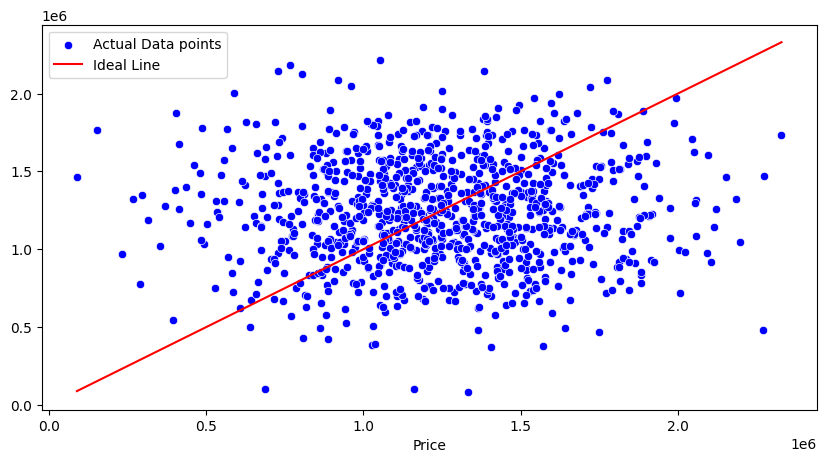

In [24]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test) ], [min(y_test) , max(y_test)] , color='red', label='Ideal Line')
plt.legend()
plt.show()

In [25]:
results = np.column_stack((y_test,y_pred))
print("actual value  | predicted value")
print("-------------------------------")
for actual, predicted in results:
   print(f"{actual : 14.2f}  | {predicted : 12.2f}")


actual value  | predicted value
-------------------------------
    1251688.62  |   1255342.46
     873048.32  |   1515839.26
    1696977.66  |   1090318.25
    1063964.29  |   1362186.73
     948788.28  |   1493295.55
     730043.65  |   1362686.59
    1166925.15  |    996262.16
     705444.12  |    934168.06
    1499988.88  |   1512131.00
    1288199.15  |   1120609.71
    1441736.76  |   1156032.17
    1279681.15  |   1417247.41
    1754969.16  |   1537310.30
    1511653.45  |   1426489.73
    1441956.20  |   1008132.56
    1119992.62  |   1264688.78
     727866.53  |    977207.05
    1138885.10  |   1457525.55
    1074263.32  |   1432200.70
    1386473.37  |   1540912.86
     404643.60  |   1876647.25
    1449829.49  |   1053681.70
    1775874.76  |   1144390.87
    1202050.58  |   1056256.83
    1105737.46  |    699995.13
    1835564.69  |    936643.23
    1795428.77  |   1508830.60
    1424283.37  |    886319.89
    1365945.08  |   1426125.82
    1492011.50  |   1140504.28
     6

In [26]:
#residual analysis= actual - predicted values to make results easy
residual= actual - y_pred.reshape(-1)
print(residual)

[-6.71455799e+04 -3.27642379e+05  9.78786356e+04 -1.73989846e+05
 -3.05098672e+05 -1.74489703e+05  1.91934723e+05  2.54028818e+05
 -3.23934116e+05  6.75871732e+04  3.21647152e+04 -2.29050528e+05
 -3.49113421e+05 -2.38292852e+05  1.80064322e+05 -7.64918997e+04
  2.10989834e+05 -2.69328664e+05 -2.44003820e+05 -3.52715982e+05
 -6.88450368e+05  1.34515186e+05  4.38060132e+04  1.31940049e+05
  4.88201752e+05  2.51553649e+05 -3.20633714e+05  3.01876995e+05
 -2.37928936e+05  4.76926058e+04 -2.23705411e+05  6.86489468e+04
 -4.62813273e+05  2.89858143e+05 -1.18239412e+05  1.75913828e+05
  6.58767709e+04 -3.02896594e+05 -1.81996817e+05  5.23275917e+05
 -3.56537099e+05 -4.09473210e+05 -2.40431993e+05  4.46961159e+05
 -4.02380130e+04  7.53031457e+04  2.18467350e+05 -4.29788213e+05
  2.93535024e+05 -1.50134177e+05 -1.86591639e+05 -2.02529122e+05
 -2.72842903e+04  3.29745659e+05  5.70810464e+04 -1.83282606e+05
  1.09013238e+05  1.53771579e+05 -5.48086701e+05 -9.54947222e+05
 -1.78051008e+05  1.74356

<Axes: ylabel='Density'>

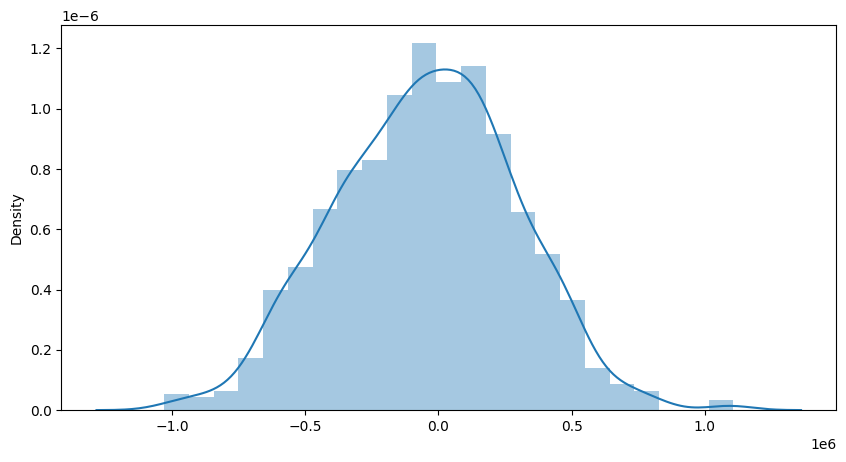

In [27]:
#distribution plot for residual
sns.distplot(residual ,kde=True)

In [29]:
#score it
from sklearn.metrics import mean_squared_error
print('linear regrssion model')
#results
print('--'*30)
#mean_squared_error(y_test,y_pred)
mea= mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mea)
#print evaluation metrices
print("Mean Squared Error :" , mea)
print("Root Mean Squared Error :" , rmse)

linear regrssion model
------------------------------------------------------------
Mean Squared Error : 237175614060.2138
Root Mean Squared Error : 487006.7905688932


In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
pre_process=preprocessing.StandardScaler().fit(x)
x_transform=pre_process.fit_transform(x)


In [ ]:
#pipe= make_pipeline (StandardScalar() , logisticregression())
#pipe.fit(x_train , y_train )

In [33]:
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [35]:
y # represents the target
y.shape

(5000,)

In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x_transform ,y,test_size=.10, random_state=101)